In [135]:
#Como montar um gráfico usando o API IBGE

#Baixar o API IBGE localidades (Regiões, Estados e municipíos)
# Primeiro precisa intalar as bibliotecas, pandas, numpy, urllib3
# Depois precisa fazer a importação para o jupyter. Precisa baixar a biblioteca url lib3, json
#Posso intalar o pip install ibge. 
#URL do IBGE https://servicodados.ibge.gov.br/api/docs
#URL municipios https://servicodados.ibge.gov.br/api/v1/localidades/estados/{UF}/municipios

import urllib3
import json
import matplotlib.pyplot as plt
import array 
import numpy
import pandas as pd
import requests




In [136]:
http = urllib3.PoolManager()
urlportalapiIBGE = 'https://servicodados.ibge.gov.br/api/v1/projecoes/populacao'
response = http.request('GET', urlportalapiIBGE)
print ("Response Status: ",response.status)

Response Status:  200


In [45]:
#Os dados estão em formato stg. Usar o ytf-8 para resolver a questão de Ç e acentos.

data_response = response.data.decode("utf-8")
data_response


'{"localidade":"0","horario":"14/10/2022 12:19:54","projecao":{"populacao":215223214,"periodoMedio":{"incrementoPopulacional":21322,"nascimento":12000,"obito":45000}}}'

In [46]:
#Transformar os string em formato json

data_json = json.loads(data_response) 
data_json

{'localidade': '0',
 'horario': '14/10/2022 12:19:54',
 'projecao': {'populacao': 215223214,
  'periodoMedio': {'incrementoPopulacional': 21322,
   'nascimento': 12000,
   'obito': 45000}}}

In [47]:
#Pegar o horário. Temos um array json.

print(data_json["horario"])

14/10/2022 12:19:54


In [48]:
print(data_json["projecao"]["periodoMedio"])

{'incrementoPopulacional': 21322, 'nascimento': 12000, 'obito': 45000}


In [49]:
data_grafico = (data_json["projecao"]["periodoMedio"])
data_grafico

{'incrementoPopulacional': 21322, 'nascimento': 12000, 'obito': 45000}

In [52]:
total_nascimento = data_grafico["nascimento"]
total_obito = data_grafico["obito"]
data_atualizacao = data_json["horario"]
print(data_atualizacao)
print(total_nascimento)
print(total_obito)

14/10/2022 12:19:54
12000
45000


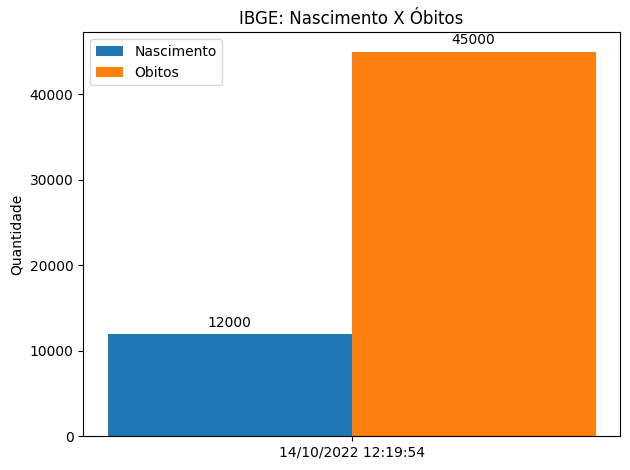

In [58]:
#Gerando o gráfico pelo matplotlib

labels = [data_atualizacao]
data_nascimento = [total_nascimento]
data_obito = [total_obito]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, data_nascimento, width, label='Nascimento')
rects2 = ax.bar(x + width/2, data_obito, width, label='Obitos')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Quantidade')
ax.set_title('IBGE: Nascimento X Óbitos')
ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

In [124]:
#Importando agora o IBGE localidades
#Precisa ter instalado o requests

import pandas as pd
import numpy 
import requests
import pprint
import json
import ibge.localidades

http = urllib3.PoolManager()
link_localidades = 'https://servicodados.ibge.gov.br/api/v1/localidades/estados/28/municipios'
requisicao = requests.get(link_localidades)


informacoes = requisicao.json()



In [137]:
headers = {
    'Content-Type': 'application/json;charset=UTF-8',
    'User-Agent': 'google-colab',
    'Accept': 'application/json, text/plain, */*',
    'Accept-Encoding': 'gzip, deflate, br',
    'Accept-Language': 'pt-BR,pt;q=0.9,en-US;q=0.8,en;q=0.7',
    'Connection': 'keep-alive',
}

cidades = requests.get("https://servicodados.ibge.gov.br/api/v1/localidades/estados/28/municipios",
                       headers=headers).json()


nome_se = [municipios["nome"] for municipios in cidades]
id_se   = [municipios["id"] for municipios in cidades]

data_se = pd.DataFrame.from_dict({'ID':id_se,'MUNICIPIOS':nome_se})
data_se




ID               MUNICIPIOS
0   2800100  Amparo do São Francisco
1   2800209                 Aquidabã
2   2800308                  Aracaju
3   2800407                    Arauá
4   2800506             Areia Branca
..      ...                      ...
70  2807204                   Siriri
71  2807303                    Telha
72  2807402           Tobias Barreto
73  2807501            Tomar do Geru
74  2807600                  Umbaúba

[75 rows x 2 columns]

In [138]:
ufs_array = ['AC', 'AL', 'AM', 'AP', 'BA', 'BR', 'CE', 'DF', 'ES', 'GO', 'MA', 'MG', 'MS', 'MT', 'PA', 'PB', 'PE', 'PI', 'PR', 'RJ', 'RN', 'RO', 'RR', 'RS', 'SC', 'SE', 'SP', 'TO']
for i in ufs_array:
    url_eleicoes_2022=f'https://cdn.tse.jus.br/estatistica/sead/odsele/votacao_secao/votacao_secao_2022_{i}.zip'
    print(url_eleicoes_2022)
    


# USUÁRIOS WINDOWS: PRECISAM ALTERAR \ POR / NO DIRETÓRIO
sa_dir = 'C://Users//Win10 pro i3 10°//Desktop//microdados_eleicoes'

# TABELA VOTAÇÃO SEÇÃO Município Zona
colunas = ['SG_UF', 'CD_MUNICIPIO', 'NM_MUNICIPIO', 'NR_ZONA', 'NR_SECAO', 'NR_LOCAL_VOTACAO', 'CD_CARGO_PERGUNTA','DS_CARGO_PERGUNTA', 'NR_PARTIDO', 'SG_PARTIDO', 'NM_PARTIDO', 
'QT_APTOS', 'QT_COMPARECIMENTO', 'QT_ABSTENCOES', 'DS_TIPO_VOTAVEL', 'NR_VOTAVEL', 'NM_VOTAVEL', 'QT_VOTOS']


https://cdn.tse.jus.br/estatistica/sead/odsele/votacao_secao/votacao_secao_2022_AC.zip
https://cdn.tse.jus.br/estatistica/sead/odsele/votacao_secao/votacao_secao_2022_AL.zip
https://cdn.tse.jus.br/estatistica/sead/odsele/votacao_secao/votacao_secao_2022_AM.zip
https://cdn.tse.jus.br/estatistica/sead/odsele/votacao_secao/votacao_secao_2022_AP.zip
https://cdn.tse.jus.br/estatistica/sead/odsele/votacao_secao/votacao_secao_2022_BA.zip
https://cdn.tse.jus.br/estatistica/sead/odsele/votacao_secao/votacao_secao_2022_BR.zip
https://cdn.tse.jus.br/estatistica/sead/odsele/votacao_secao/votacao_secao_2022_CE.zip
https://cdn.tse.jus.br/estatistica/sead/odsele/votacao_secao/votacao_secao_2022_DF.zip
https://cdn.tse.jus.br/estatistica/sead/odsele/votacao_secao/votacao_secao_2022_ES.zip
https://cdn.tse.jus.br/estatistica/sead/odsele/votacao_secao/votacao_secao_2022_GO.zip
https://cdn.tse.jus.br/estatistica/sead/odsele/votacao_secao/votacao_secao_2022_MA.zip
https://cdn.tse.jus.br/estatistica/sead/ods

In [139]:



#Importar arquivos Boletins de urna

uf_1 = 'AC'
arq = f'{sa_dir}/{uf_1}/bweb_1t_{uf_1}_051020221321.CSV'
d_ac = read_csv(arq, sep = ';', encoding = 'ISO-8859-1', usecols = colunas)

uf_2 = 'AL'
arq = f'{sa_dir}/{uf_2}/bweb_1t_{uf_2}_051020221321.CSV'
d_al = read_csv(arq, sep = ';', encoding = 'ISO-8859-1', usecols = colunas)

uf_3 = 'AM'
arq = f'{sa_dir}/{uf_3}/bweb_1t_{uf_3}_051020221321.CSV'
d_am = read_csv(arq, sep = ';', encoding = 'ISO-8859-1', usecols = colunas)

uf_4 = 'AP'
arq = f'{sa_dir}/{uf_4}/bweb_1t_{uf_4}_051020221321.CSV'
d_ap = read_csv(arq, sep = ';', encoding = 'ISO-8859-1', usecols = colunas)

uf_5 = 'BA'
arq = f'{sa_dir}/{uf_5}/bweb_1t_{uf_5}_051020221321.CSV'
d_ba = read_csv(arq, sep = ';', encoding = 'ISO-8859-1', usecols = colunas)

uf_6 = 'CE'
arq = f'{sa_dir}/{uf_6}/bweb_1t_{uf_6}_051020221321.CSV'
d_ce = read_csv(arq, sep = ';', encoding = 'ISO-8859-1', usecols = colunas)

uf_7 = 'DF'
arq = f'{sa_dir}/{uf_7}/bweb_1t_{uf_7}_051020221321.CSV'
d_df = read_csv(arq, sep = ';', encoding = 'ISO-8859-1', usecols = colunas)

uf_8 = 'ES'
arq = f'{sa_dir}/{uf_8}/bweb_1t_{uf_8}_051020221321.CSV'
d_es = read_csv(arq, sep = ';', encoding = 'ISO-8859-1', usecols = colunas)

uf_9 = 'GO'
arq = f'{sa_dir}/{uf_9}/bweb_1t_{uf_9}_051020221321.CSV'
d_go = read_csv(arq, sep = ';', encoding = 'ISO-8859-1', usecols = colunas)

uf_10 = 'MA'
arq = f'{sa_dir}/{uf_10}/bweb_1t_{uf_10}_051020221321.CSV'
d_ma = read_csv(arq, sep = ';', encoding = 'ISO-8859-1', usecols = colunas)

uf_11 = 'MG'
arq = f'{sa_dir}/{uf_11}/bweb_1t_{uf_11}_051020221321.CSV'
d_mg = read_csv(arq, sep = ';', encoding = 'ISO-8859-1', usecols = colunas)

uf_12 = 'MS'
arq = f'{sa_dir}/{uf_12}/bweb_1t_{uf_12}_051020221321.CSV'
d_ms = read_csv(arq, sep = ';', encoding = 'ISO-8859-1', usecols = colunas)

uf_13 = 'MT'
arq = f'{sa_dir}/{uf_13}/bweb_1t_{uf_13}_051020221321.CSV'
d_mt = read_csv(arq, sep = ';', encoding = 'ISO-8859-1', usecols = colunas)

uf_14 = 'PA'
arq = f'{sa_dir}/{uf_14}/bweb_1t_{uf_14}_051020221321.CSV'
d_pa = read_csv(arq, sep = ';', encoding = 'ISO-8859-1', usecols = colunas)

uf_15 = 'PB'
arq = f'{sa_dir}/{uf_15}/bweb_1t_{uf_15}_051020221321.CSV'
d_pb = read_csv(arq, sep = ';', encoding = 'ISO-8859-1', usecols = colunas)

uf_16 = 'PE'
arq = f'{sa_dir}/{uf_16}/bweb_1t_{uf_16}_051020221321.CSV'
d_pe = read_csv(arq, sep = ';', encoding = 'ISO-8859-1', usecols = colunas)

uf_17 = 'PI'
arq = f'{sa_dir}/{uf_17}/bweb_1t_{uf_17}_051020221321.CSV'
d_pi = read_csv(arq, sep = ';', encoding = 'ISO-8859-1', usecols = colunas)

uf_18 = 'PR'
arq = f'{sa_dir}/{uf_18}/bweb_1t_{uf_18}_051020221321.CSV'
d_pr = read_csv(arq, sep = ';', encoding = 'ISO-8859-1', usecols = colunas)

uf_19 = 'RJ'
arq = f'{sa_dir}/{uf_19}/bweb_1t_{uf_19}_051020221321.CSV'
d_rj = read_csv(arq, sep = ';', encoding = 'ISO-8859-1', usecols = colunas)

uf_20 = 'RN'
arq = f'{sa_dir}/{uf_20}/bweb_1t_{uf_20}_051020221321.CSV'
d_rn = read_csv(arq, sep = ';', encoding = 'ISO-8859-1', usecols = colunas)

uf_21 = 'RO'
arq = f'{sa_dir}/{uf_21}/bweb_1t_{uf_21}_051020221321.CSV'
d_ro = read_csv(arq, sep = ';', encoding = 'ISO-8859-1', usecols = colunas)

uf_22 = 'RR'
arq = f'{sa_dir}/{uf_22}/bweb_1t_{uf_22}_051020221321.CSV'
d_rr = read_csv(arq, sep = ';', encoding = 'ISO-8859-1', usecols = colunas)

uf_23 = 'RS'
arq = f'{sa_dir}/{uf_23}/bweb_1t_{uf_23}_051020221321.CSV'
d_rs = read_csv(arq, sep = ';', encoding = 'ISO-8859-1', usecols = colunas)

uf_24 = 'SC'
arq = f'{sa_dir}/{uf_24}/bweb_1t_{uf_24}_051020221321.CSV'
d_sc = read_csv(arq, sep = ';', encoding = 'ISO-8859-1', usecols = colunas)

uf_25 = 'SE'
arq = f'{sa_dir}/{uf_25}/bweb_1t_{uf_25}_051020221321.CSV'
d_se = read_csv(arq, sep = ';', encoding = 'ISO-8859-1', usecols = colunas)

uf_26 = 'SP'
arq = f'{sa_dir}/{uf_26}/bweb_1t_{uf_26}_051020221321.CSV'
d_sp = read_csv(arq, sep = ';', encoding = 'ISO-8859-1', usecols = colunas)

uf_27 = 'TO'
arq = f'{sa_dir}/{uf_27}/bweb_1t_{uf_27}_051020221321.CSV'
d_to = read_csv(arq, sep = ';', encoding = 'ISO-8859-1', usecols = colunas)

In [ ]:
merged_df=df1.merge(df2,how='right')
print("Merged DataFrame:")
print(merged_df)



NameError: name 'municipios' is not defined